In [1]:
import numpy as np
import pandas as pd
import qml
import scipy.spatial as scs
import glob
import scipy.interpolate as sci
import functools
import matplotlib.pyplot as plt
%load_ext line_profiler
#c = qml.Compound('../../test/c20.xyz')
from pymatgen.symmetry import analyzer as psa
from pymatgen.core import Molecule

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
@functools.lru_cache(10)
def read_DENSITY(fn):
    with open(fn, 'r') as fh:
        _ = np.fromfile(fh, 'i4')
        q = _[3:-1].view(np.float64)
        ccdensity = q.reshape((-1, 10))
    ccdensity = ccdensity[:, 1:6]
    return ccdensity[:, :3]/1.8897259885789, ccdensity[:, 3], ccdensity[:, 4]

In [3]:
def get_interaction(fn):
    grid, weights, dens = read_DENSITY(fn)
    
    acton = []
    for aidx in range(20):
        ds = np.linalg.norm(grid*1.8897259885789 - c.coordinates[aidx]*1.8897259885789, axis=1)
        acton.append((weights*dens/ds).sum())
    return np.array(acton)
    

#q = get_interaction('c20-data/derivatives/order-0/site-all-cc/DENSITY')
#min(q)-max(q)

In [10]:
q = get_interaction('c20-data/derivatives/order-0/site-all-cc/DENSITY.SCF')
min(q)-max(q)

-0.03926261377993967

In [12]:
c = qml.Compound('c20-symmetric.xyz')
q = get_interaction('symmetrytest/DENSITY')
print (min(q)-max(q))
c = qml.Compound('c20-symmetric.xyz')
q = get_interaction('symmetrytest/DENSITY-unconv')
print (min(q)-max(q))

-0.038210408054567324
-0.062159439671226835


In [10]:
mol = Molecule(c.nuclear_charges, c.coordinates)
a = psa.PointGroupAnalyzer(mol)
mol2 = a.symmetrize_molecule()['sym_mol']

In [29]:
q = mol2.cart_coords.copy()

In [38]:
q = q- q.sum(axis=0)/20

In [45]:
for i in q:
    print ( i[0], i[1], i[2], 0.)

-0.7470633342766211 -1.028244038050714 1.6637333313839093 0.0
-1.2087742096462073 0.3927536638655645 1.6637329955496833 0.0
-5.724240224767516e-07 1.2709791682915 1.663733787631747 0.0
1.2087737189638086 0.39275408162998493 1.6637333313839093 0.0
0.7470629754254333 -1.0282443767242935 1.6637333313839093 0.0
-1.2087734803182608 -1.663733658186504 0.3927527424684561 0.0
-1.9558356394234448 -0.6354893093132393 -0.39275669399701896 0.0
-1.9558362594898482 0.6354899802769969 0.3927527424684561 0.0
-1.2087729399563858 1.663733656751988 -0.39275433487564015 0.0
2.327117416779309e-07 2.056487578360569 0.39275538293000695 0.0
1.2087733417045277 1.6637337593967074 -0.392752993824324 0.0
1.9558357467164487 0.6354893341124536 0.39275687578371987 0.0
1.9558358985994728 -0.6354901632867145 -0.3927545559004698 0.0
1.208773067674104 -1.6637336253163797 0.3927544819137797 0.0
-5.046833732860398e-07 -2.056487676791948 -0.3927545559004698 0.0
-0.7470628681324295 1.0282444015235073 -1.6637331495972085 0.0

In [46]:
a2 = psa.PointGroupAnalyzer(mol2)

In [63]:
def test_geo(coords):
    mol = Molecule(c.nuclear_charges, coords)
    a = psa.PointGroupAnalyzer(mol)
    deviations = []
    for symop in a.get_symmetry_operations():
        newcoord = symop.operate_multi(coords)
        ds = scs.distance.cdist(coords, newcoord)
        deviations.append(max(ds[np.where(ds < 1e-1)]))
    return np.array(deviations)

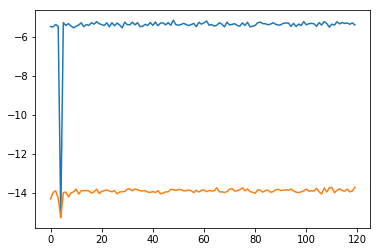

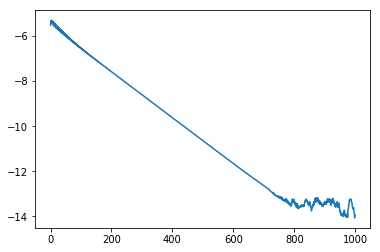

In [90]:
plt.plot(np.log(test_geo(c.coordinates))/np.log(10))
mol = Molecule(c.nuclear_charges, c.coordinates)
initgeo = c.coordinates.copy()
progress = []
for it in range(1000):
    mol = Molecule(c.nuclear_charges, initgeo)
    a = psa.PointGroupAnalyzer(mol)
    mol = a.symmetrize_molecule()['sym_mol']
    initgeo = mol.cart_coords
    initgeo -= initgeo.mean(axis=0)
    progress.append(np.mean(np.log(test_geo(initgeo))/np.log(10)))

plt.plot(np.log(test_geo(initgeo))/np.log(10))
plt.show()
plt.plot(progress)
#plt.ylim(-6, -5)

In [1]:
for i in initgeo:
    print ('%s', i[0], i[1], i[2],)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


NameError: name 'initgeo' is not defined

In [95]:
progress[-1]

-13.919970096732648

In [18]:
c1 = qml.Compound('c20-symmetric.xyz')
c2 = qml.Compound('../../test/c20.xyz')


In [25]:
a.mean(axis=0)

array([-1.02503047e-05, -9.74638320e-05,  1.97339457e-04])

In [7]:
coord, weight, dens = read_DENSITY('symmetrytest/DENSITY')
coord2, weight2, dens2 = read_DENSITY('symmetrytest/DENSITY-unconv')

In [11]:
np.abs(dens - dens2).max()

0.2085269355847288